# Eartch albedo

A short study about the impact of the albedo reduction on earth's radiation equilibrium.

## About the dataset

Albedo is the ratio of reflected light to total incident sunlight for a given area of the land surface. It is a fundamental property controlling the energy flux at the surface of the Earth, which means it is an important parameter for climate and weather models. It can provide information on biophysical characteristics of the land surface including the structure of vegetation canopies, soil moisture, and urbanization.

When the Sun illuminates the Earth’s surface, light is falling on the surface from multiple angles and it is being reflected in multiple directions. The albedo a satellite measures will depends on the angle of incident light (which changes with latitude and the time of day), the viewing angle of the sensor, and the wavelength of incident sunlight.

Thus, in the real world, a surface doesn't have a single albedo, but rather multiple albedos which must be combined to give an accurate description of the way a surface reflects and absorbs solar energy. The combination of these multiple albedos is described by the integral of a mathematical equation called the bi-directional reflectance distribution function, or BRDF.

The albedo pictured in these images is the directional hemispherical reflectance, which is obtained by integrating the BRDF over the exitance hemisphere (i.e., from horizon to horizon) for a single irradiance direction, in other words, as if all the light were coming from one direction. Known as “black sky albedo” it is the albedo that would be observed when the Sun was directly overhead (local solar noon) at each location. Individual (spectral) albedos have been combined into a broadband albedo for the entire visible spectrum. The observations are based on atmospherically corrected, cloud-cleared reflectance observations from the MODIS sensors on NASA’s Aqua and Terra satellites.


## Credits

Images by Reto Stöckli, NASA’s Earth Observatory Group, using data provided by the MODIS Land Science Team.

### Play around on

```https://neo.sci.gsfc.nasa.gov/analysis/index.php```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## cleanup

The datasets have different spatial resolutions. Firstly, the index of the albedo csv data is set to degree units.

* Lattitude
  * negative values refer to the northern hemisphere
  * positive values refer to the southern hemisphere
* Longitude
  * positive values refer to the west of the greenwhich median
  * negative values refer to the east of the greenwhich median

The albedo spatial resolution is 0.1 degrees.

In [77]:
df1 = pd.read_csv('data/albedo/2013-02_albedo_nasa.csv', header=None)
df1 = (df1 < 1) * df1

df1.index = df1.index.values * 0.1 - 90
df1.columns = df1.columns.values * 0.1 - 180

df2 = pd.read_csv('data/albedo/2013-07_albedo_nasa.csv', header=None)
df2 = (df2 < 1) * df2

df2.index = df2.index.values * 0.1 - 90
df2.columns = df2.columns.values * 0.1 - 180

### Plotting of the raw data

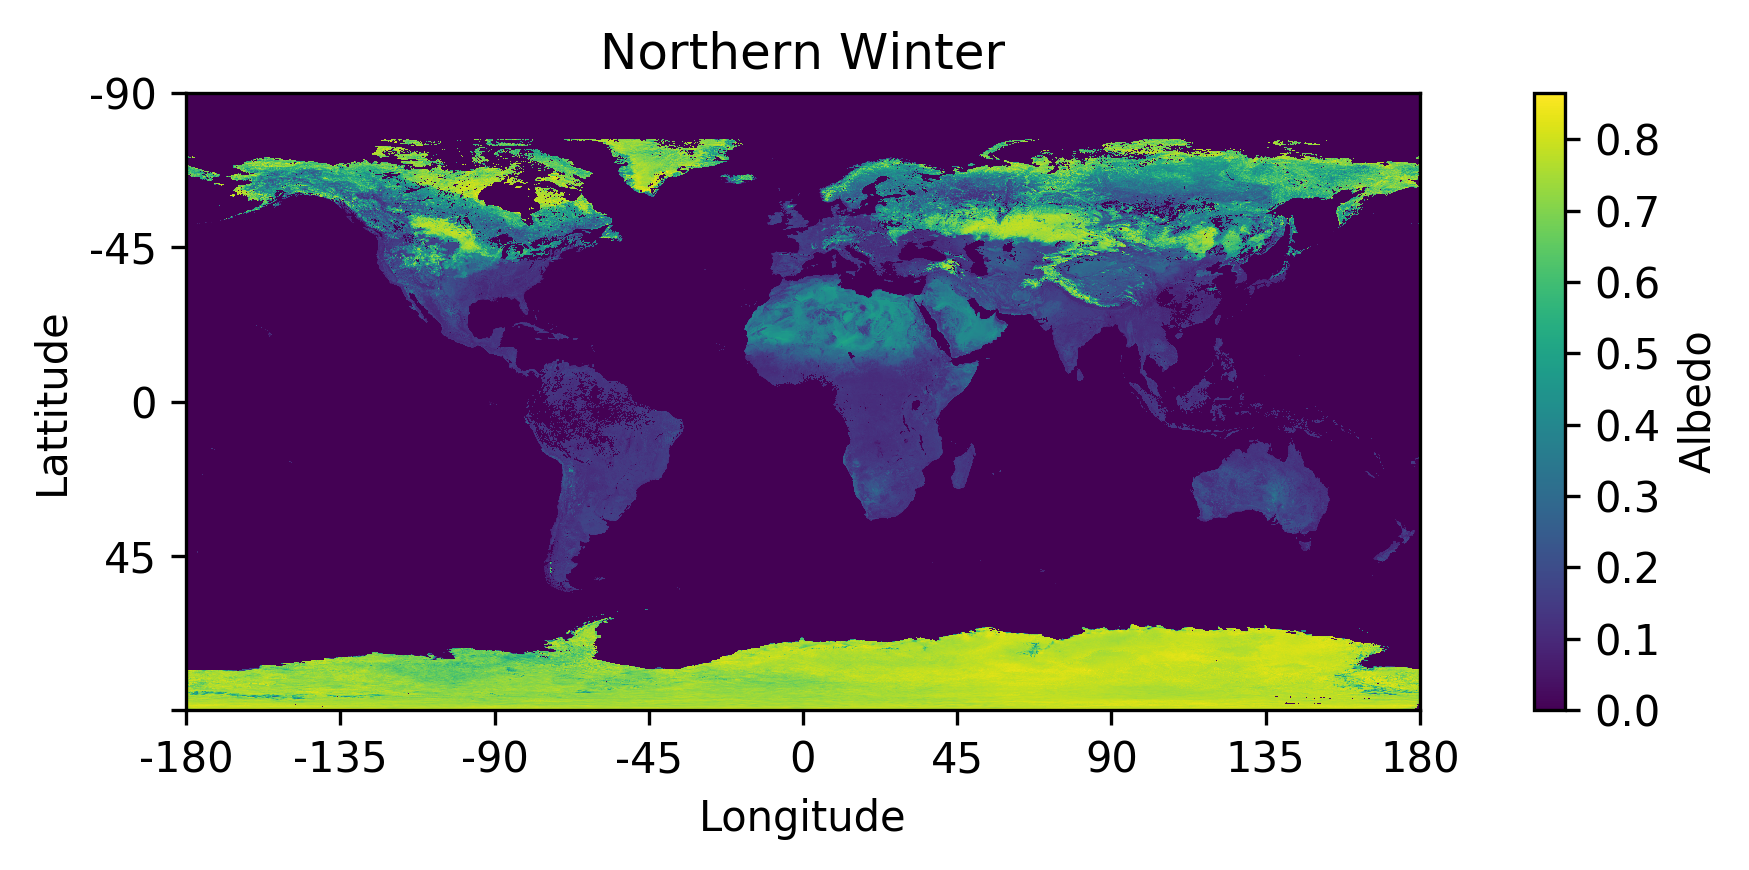

In [112]:
plt.figure(figsize=(8,3), dpi=300)

plt.imshow(df1.values, aspect=1)

cbar = plt.colorbar()
cbar.set_label('Albedo')

plt.xticks(np.linspace(0,3600,9), np.arange(-180,181,45))
plt.yticks(np.linspace(0,1800,5), np.arange(-90,90,45))

plt.title('Northern Winter')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')

plt.tight_layout()

plt.savefig('plots/albedo_2013_feb.png')

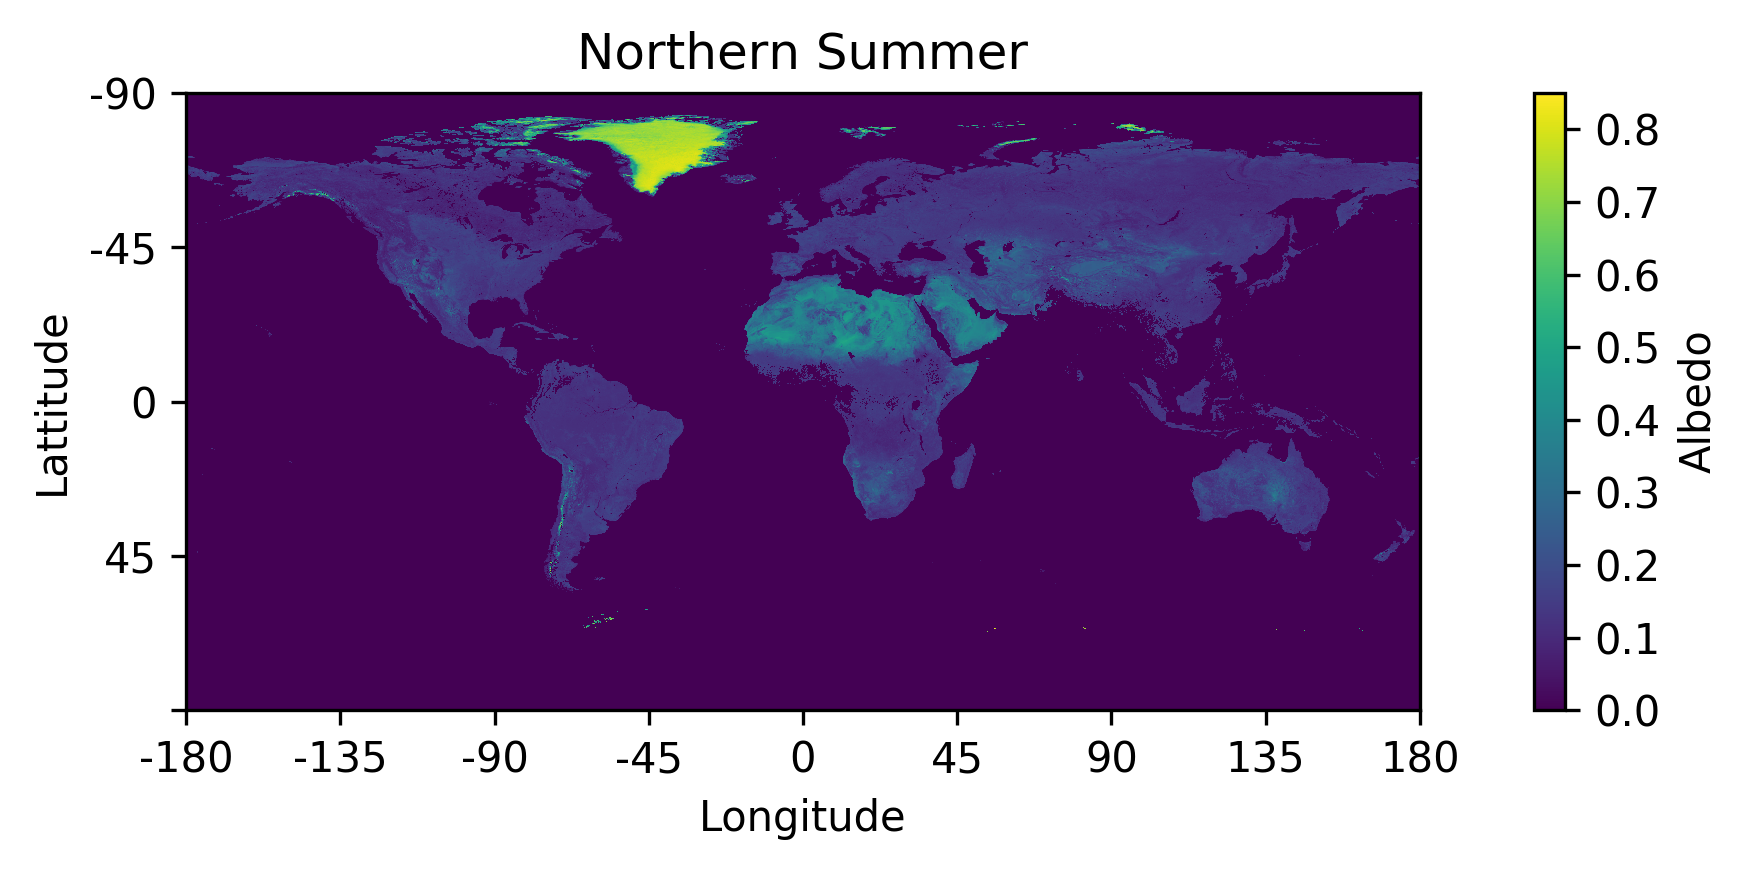

In [113]:
plt.figure(figsize=(8,3), dpi=300)

plt.imshow(df2.values, aspect=1)

cbar = plt.colorbar()
cbar.set_label('Albedo')

plt.xticks(np.linspace(0,3600,9), np.arange(-180,181,45))
plt.yticks(np.linspace(0,1800,5), np.arange(-90,90,45))

plt.title('Northern Summer')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')

plt.tight_layout()
plt.savefig('plots/albedo_2013_jul.png')

## cleanup

The resolution of the solar insolation data is 0.25 degrees. Angular conventions are used as in the albedo data.

In [60]:
dfs1 = pd.read_csv('data/albedo/2013-02_sun_nasa.csv', header=None)

dfs1.index = dfs1.index.values * 0.25 - 90
dfs1.columns = dfs1.columns.values * 0.25 - 180

dfs2 = pd.read_csv('data/albedo/2013-07_sun_nasa.csv', header=None)

dfs2.index = dfs2.index.values * 0.25 - 90
dfs2.columns = dfs2.columns.values * 0.25 - 180

### Plotting of raw data

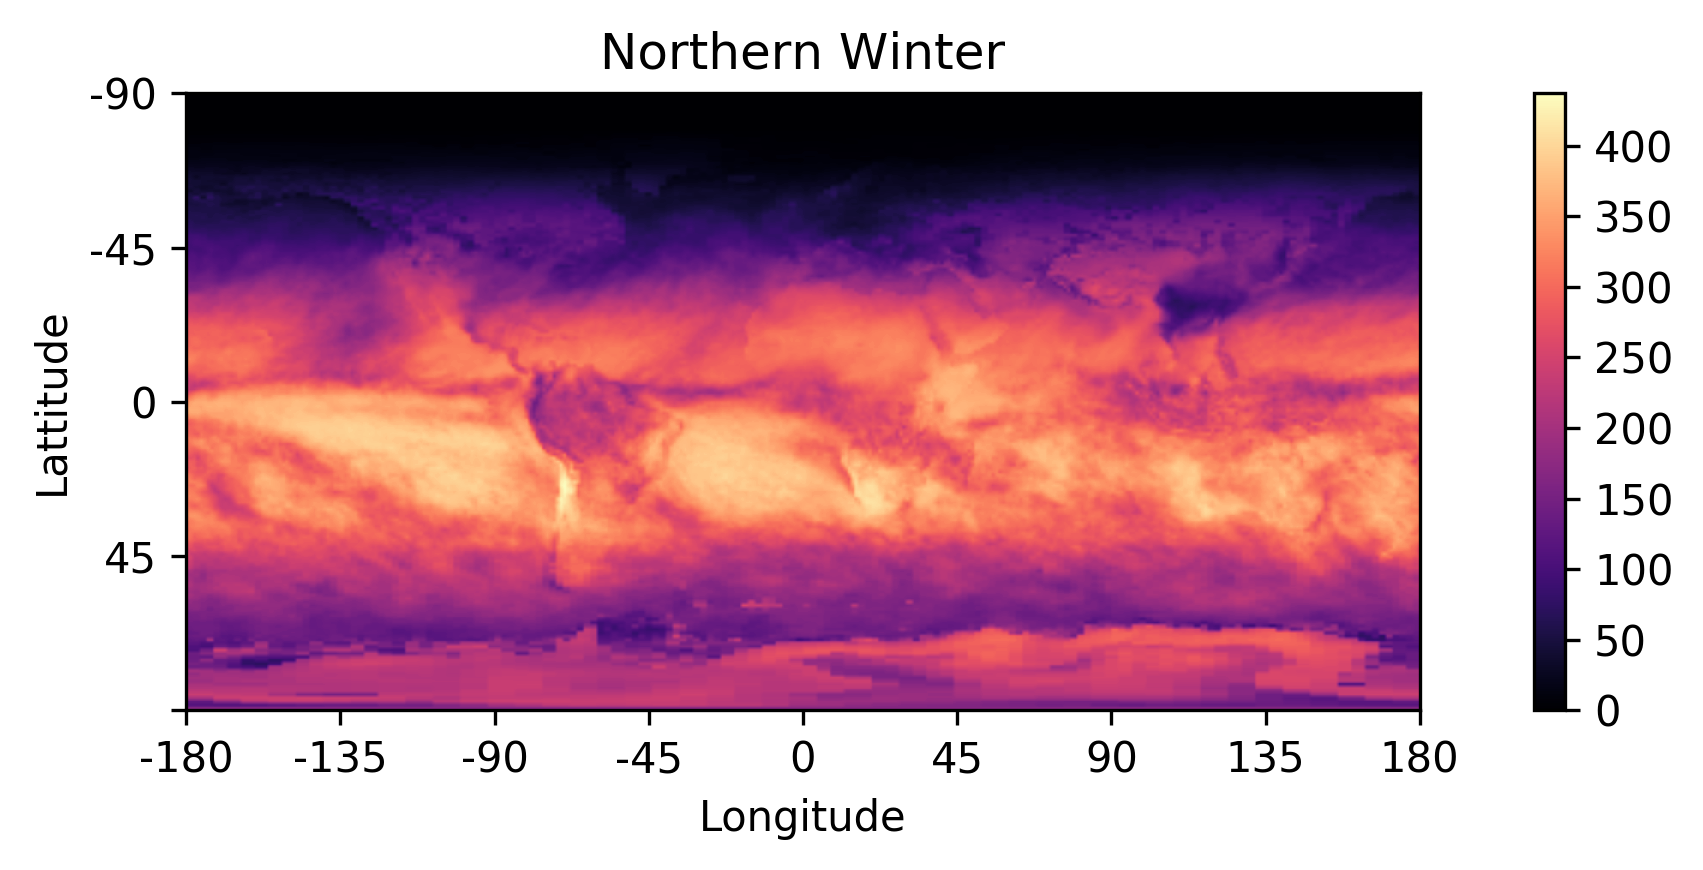

In [114]:
plt.figure(figsize=(8,3), dpi=300)

plt.imshow(dfs1.values, cmap='magma')

plt.colorbar()
cbar.set_label('Solar insulation / W/m$^2$')

plt.xticks(np.linspace(0,1440,9), np.arange(-180,181,45))
plt.yticks(np.linspace(0,720,5), np.arange(-90,90,45))

plt.title('Northern Winter')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')

plt.tight_layout()

plt.savefig('plots/insolation_2013_feb.png')

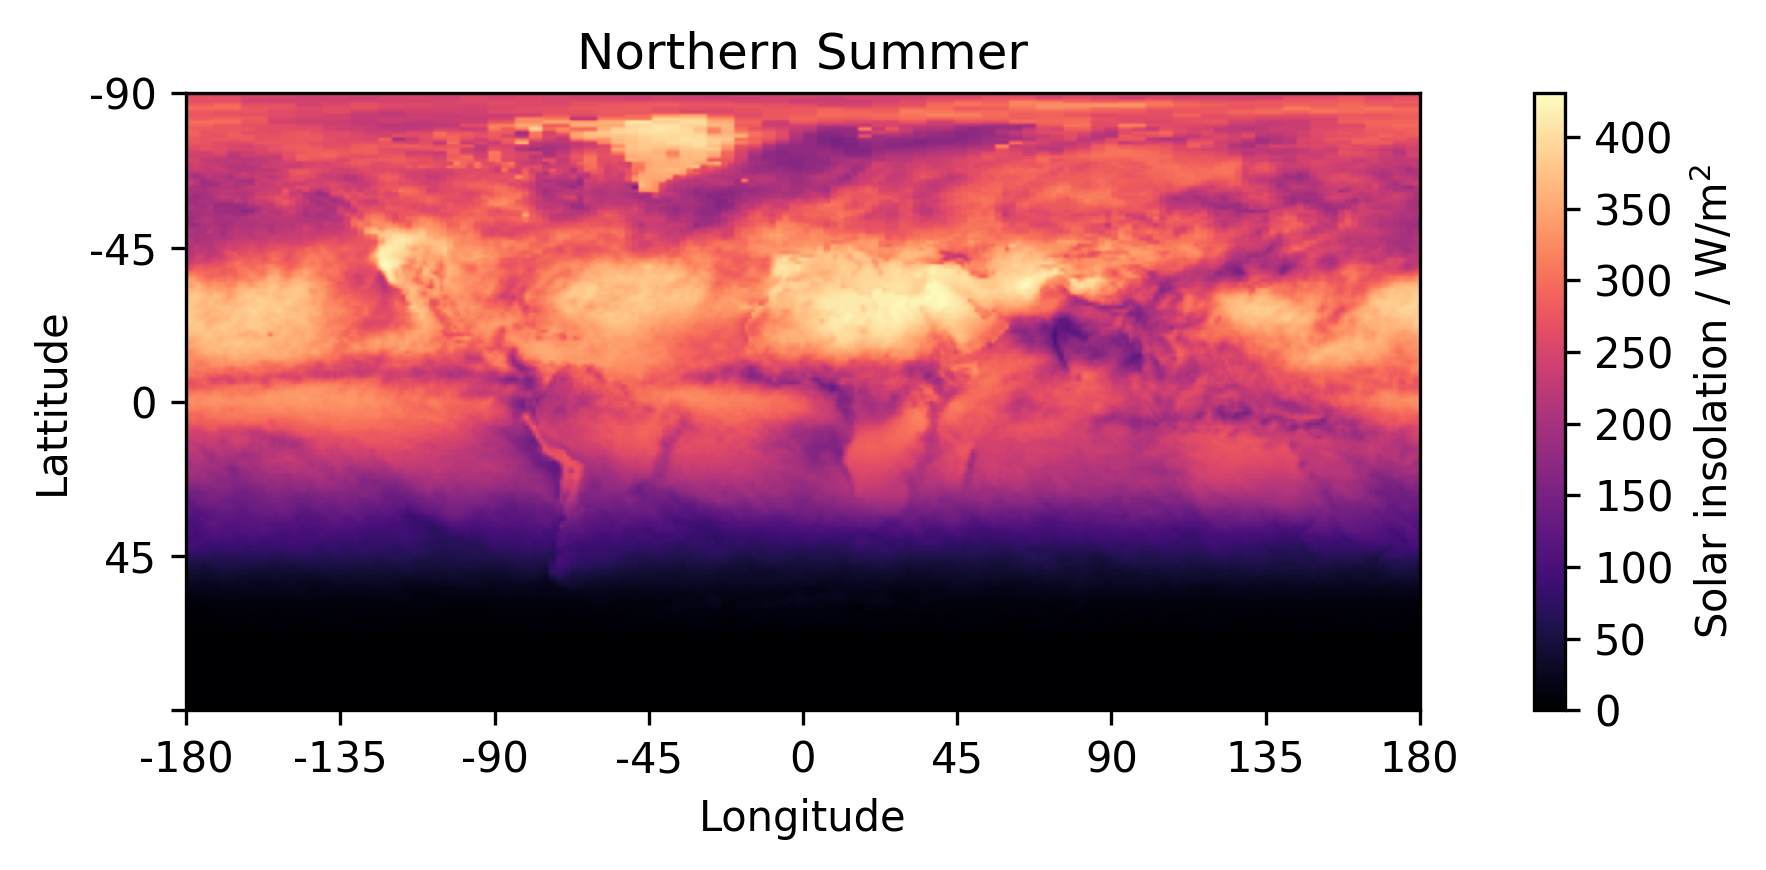

In [115]:
plt.figure(figsize=(8,3), dpi=300)

plt.imshow(dfs2.values, cmap='magma')
cbar = plt.colorbar()
cbar.set_label('Solar insolation / W/m$^2$')

plt.xticks(np.linspace(0,1440,9), np.arange(-180,181,45))
plt.yticks(np.linspace(0,720,5), np.arange(-90,90,45))

plt.title('Northern Summer')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')

plt.tight_layout()

plt.savefig('plots/insolation_2013_jul.png')

## Resampling

Due to the different spatial (angular) resolutions of both datasets, the albedo data is resampled and interpolated to the resolution of the solar insolation data.

In [116]:
dfa1 = df1.reindex(dfs1.index.values).T.reindex(dfs1.columns.values).T
dfa2 = df2.reindex(dfs2.index.values).T.reindex(dfs2.columns.values).T

dfa1 = dfa1.interpolate().T.interpolate().T
dfa2 = dfa2.interpolate().T.interpolate().T

## Albedo weighted insolation anomaly

The following plots show the albedo induced differences in solar insolation. That is the part of earth's energy bilance, that is crucially influenced by the albedo effect.

NOTE: This is simplyfied, as the impact on different wavelengths is not taken care of.

The plots show the crucial influence of the glacial areas on earth's energy budget.

### Surprise

Desert areas seem to have a huge impact on earth's energy bilance. It would be interesting to see the magnitude of their influence compared to the polar regions.

### Note

Polar areas look far larger, than they are, due to the rectangular projektion of erth's surface.

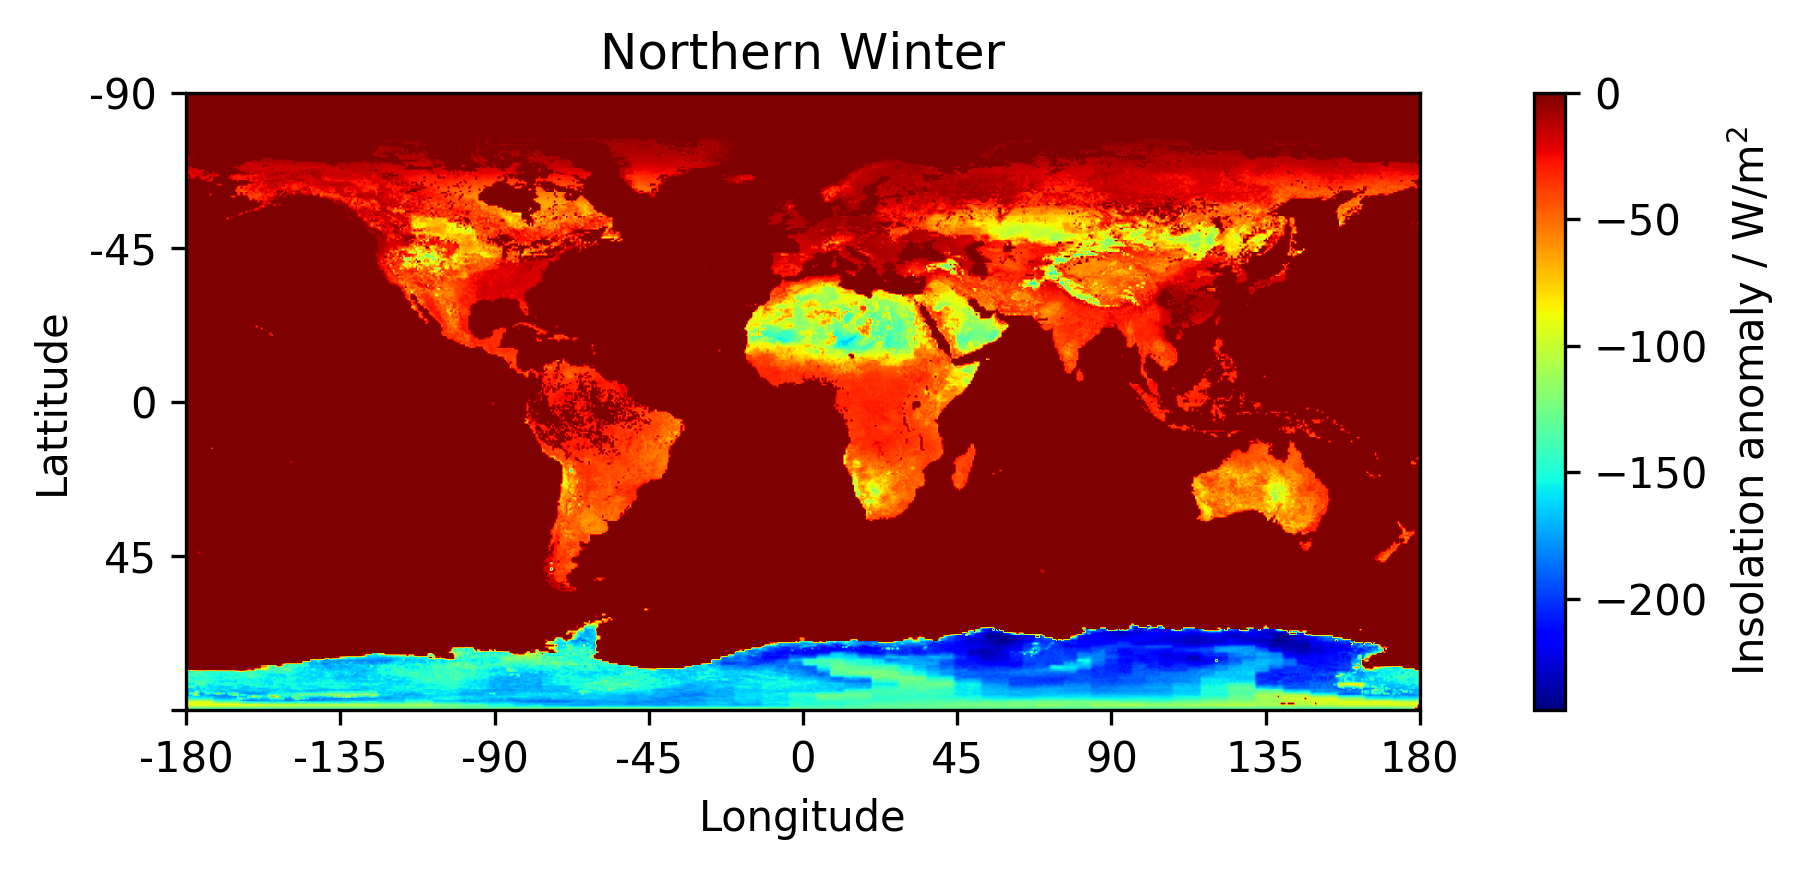

In [120]:
plt.figure(figsize=(8,3), dpi=300)
plt.imshow((1-dfa1)*dfs1.values - dfs1.values, cmap='jet')
cbar = plt.colorbar()
cbar.set_label('Insolation anomaly / W/m$^2$')

plt.xticks(np.linspace(0,1440,9), np.arange(-180,181,45))
plt.yticks(np.linspace(0,720,5), np.arange(-90,90,45))

plt.title('Northern Winter')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')

plt.tight_layout()

plt.savefig('plots/albedoreflection_2013_feb.png')

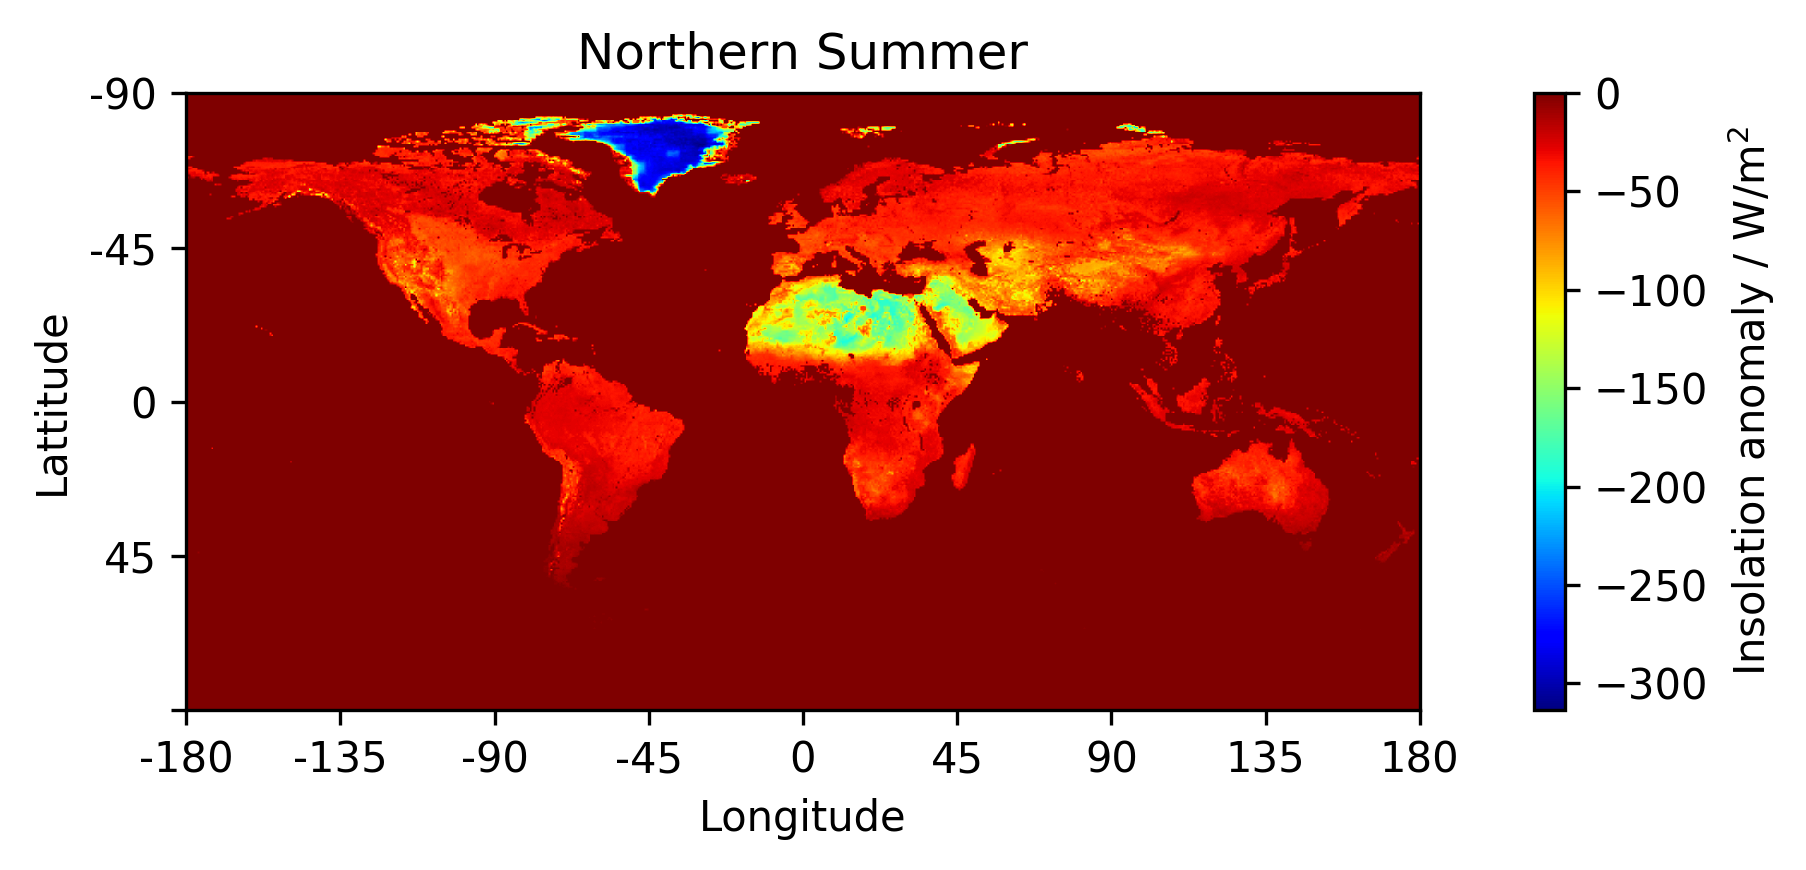

In [119]:
plt.figure(figsize=(8,3), dpi=300)
plt.imshow((1-dfa2)*dfs2.values-dfs2.values, cmap='jet')
cbar = plt.colorbar()
cbar.set_label('Insolation anomaly / W/m$^2$')

plt.xticks(np.linspace(0,1440,9), np.arange(-180,181,45))
plt.yticks(np.linspace(0,720,5), np.arange(-90,90,45))

plt.title('Northern Summer')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')

plt.tight_layout()

plt.savefig('plots/albedoreflection_2013_jul.png')